In [15]:
import sys
sys.path.append('/gpfs/exfel/exp/SPB/202501/p006933/usr/Software/analysistools')
import data_helper as dh
import focus_scan as fs
import preselecting_data as pred

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
from scipy.interpolate import interp1d

from multiprocessing import Pool

In [20]:
path = dh.expPath+'Results/FocusScans/Data/'
directory=Path(path)

runs = np.arange(278, 324)

files = [file.name for file in sorted(directory.glob('fyield_*n400.h5'), reverse=False) if int(file.name.split('_')[1][1:5]) in runs]

nshot=files[0].split('_')[5][1:4]

def load_df(file):
    run = int(file.split('_')[1][1:5])
    df = pd.read_hdf(path+file, ignore_index=True)
    df['agipd_pos_z'] = dh.data_source(run)[dh.det['agipd_z'], 'encoderPosition.value'].ndarray()[0]
    return df

with Pool(len(runs), maxtasksperchild=1) as pool:
    f_yield = pool.map(load_df, files)

In [23]:
df = pd.concat(f_yield, ignore_index=True)
print(df.columns)
df_intermediate = df[df['agipd_pos_z']>70]
df_intermediate

Index(['transmission', 'photon_energy', 'injector_pos', 'f_yield_ROI0',
       'agipd_pos_z'],
      dtype='object')


,transmission,photon_energy,injector_pos,f_yield_ROI0,agipd_pos_z
1,1.000000,10000,-1.800024,0.000004,92.000978
2,1.000000,10000,-1.800024,0.000003,92.000978
3,1.000000,9500,-1.800024,0.000003,74.999448
4,0.826072,9500,-1.800024,0.000003,74.999448
5,0.826072,9500,-1.800024,0.000005,74.999448
28,0.826072,9850,-1.800024,0.000003,86.900518
29,0.938294,9850,-1.800024,0.000009,86.900518
30,1.000000,9850,-1.800024,0.000005,86.900518
31,0.938294,9850,-1.800024,0.000005,86.900518
32,0.880397,9730,-1.800024,0.000005,82.799248


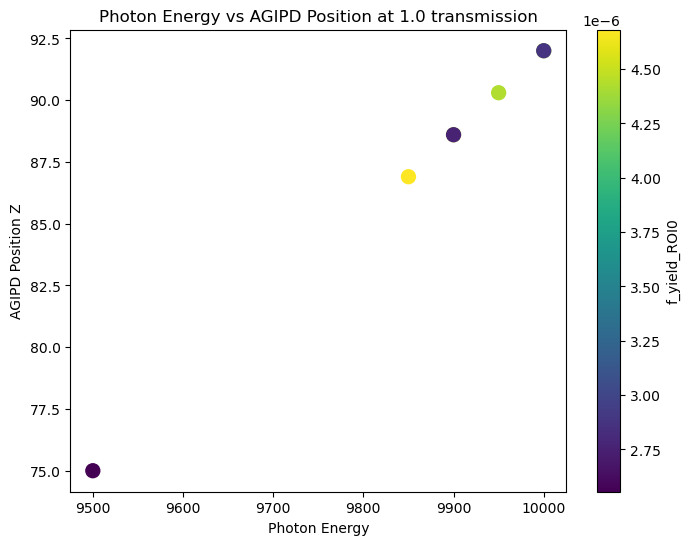

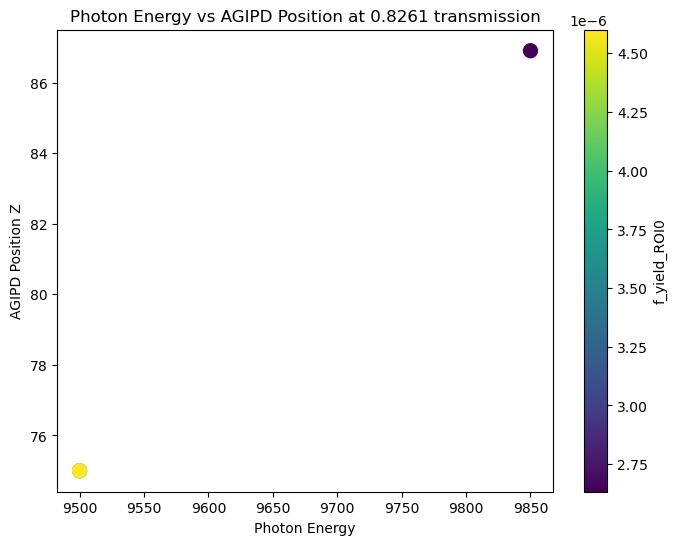

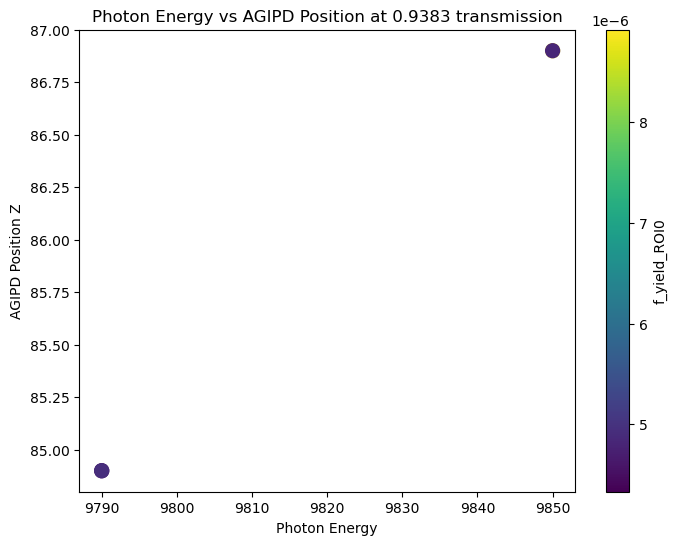

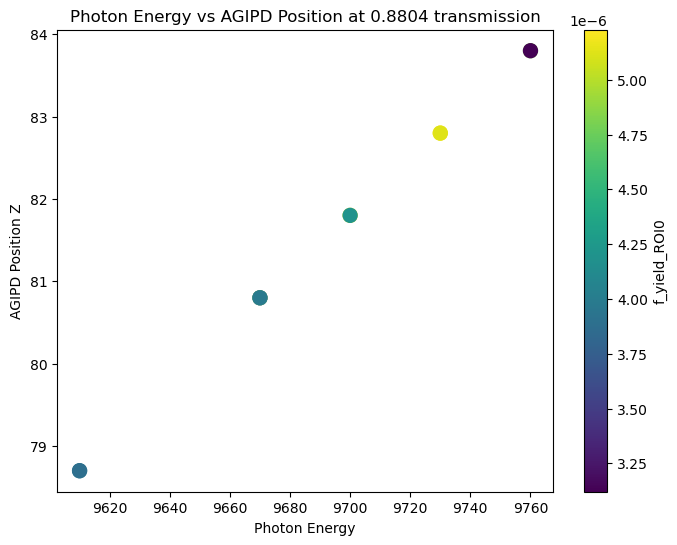

In [41]:
for trans in df_intermediate['transmission'].unique():
    df_t = df_intermediate[df_intermediate['transmission']==trans]

    plt.figure(figsize=(8, 6))
    sc = plt.scatter(df_t['photon_energy'], df_t['agipd_pos_z'], 
                     c=df_t['f_yield_ROI0'], cmap='viridis', s=100)
    
    plt.colorbar(sc, label='f_yield_ROI0')
    plt.xlabel('Photon Energy')
    plt.ylabel('AGIPD Position Z')
    plt.title('Photon Energy vs AGIPD Position at {} transmission'.format(np.round(trans, 4)))
    plt.show()